<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
#url = '/home/gabriel/diplo-datos/AnalisisyVisualizacion/sysarmy_survey_2020_processed.csv'
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [4]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [5]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [6]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [7]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [8]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang.head(3)

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
9,python,"Assembler, Bash/Shell, C, C#, Python, R",39000.0,"[assembler, bash/shell, c, c#, python, r]"


# Hasta aquí fue el pre-procesado de los datos realizado por los profes de la diplomatura

Trabajaremos a partir del data set df_lang

In [9]:
df_lang.head(10)

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

# Resolución

1. Seleccionar las columnas relevantes para analizar.

In [10]:
# Las columnas relevantes para nuestro análisis serán las columnas 'programming_language' y 'salary_monthly_NETO'

df_cured = df_lang[['programming_language','salary_monthly_NETO']]
print('Número de filas: ',len(df_cured))
df_cured.head(5)

# llamamos df_cured a nuestro data set

Número de filas:  18000


,programming_language,salary_monthly_NETO
0,ninguno,43000.0
1,html,63000.0
1,javascript,63000.0
1,python,63000.0
2,ninguno,127000.0


2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.

In [11]:
# veamos primero cuántos NaN hay en la columna 'salary_monthly_NETO' y los extraigamos del data set

print('Este DataSet tenía: ',\
      df_cured['salary_monthly_NETO'].isnull().sum()\
      ,"filas con NaN en la columna 'salary_monthly_NETO'.")

# Extraemos esas filas de nuestro data set
df_cured = df_cured.dropna()

print('Descartamos las filas con NaN.')
len_dataset_original = len(df_cured)
print('Ahora nuestro data set tiene',len_dataset_original,'filas')

df_cured.head(10)

Este DataSet tenía:  647 filas con NaN en la columna 'salary_monthly_NETO'.
Descartamos las filas con NaN.
Ahora nuestro data set tiene 17353 filas


,programming_language,salary_monthly_NETO
0,ninguno,43000.0
1,html,63000.0
1,javascript,63000.0
1,python,63000.0
2,ninguno,127000.0
3,bash/shell,102000.0
3,c,102000.0
3,css,102000.0
3,html,102000.0
3,java,102000.0


Agrupemos la información por lenguaje de programación para ver de otra forma los datos.
Ademas calculamos la media, la desviacion estándar, algunos percentiles (25, 50, 75), mínimo y máximo.

In [12]:
groups = df_cured.groupby('programming_language')['salary_monthly_NETO'].describe()
groups

,count,mean,std,min,25%,50%,75%,max
programming_language,,,,,,,,
,5.0,63718.000000,28508.378067,32000.0,36590.0,72000.0,80000.0,98000.0
(mule),1.0,32125.000000,NaN,32125.0,32125.0,32125.0,32125.0,32125.0
(programación,1.0,82307.000000,NaN,82307.0,82307.0,82307.0,82307.0,82307.0
-,4.0,70500.000000,12288.205727,58000.0,61750.0,69500.0,78250.0,85000.0
.,1.0,50000.000000,NaN,50000.0,50000.0,50000.0,50000.0,50000.0
...,...,...,...,...,...,...,...,...
xslt,2.0,23050.000000,32456.201256,100.0,11575.0,23050.0,34525.0,46000.0
y,3.0,45005.666667,41300.180343,42.0,26883.5,53725.0,67487.5,81250.0
yacc,1.0,99000.000000,NaN,99000.0,99000.0,99000.0,99000.0,99000.0


Ordenemos provisoriamente cada lenguaje desde los más populares a los menos populares.

In [13]:
groups.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
programming_language,,,,,,,,
javascript,2409.0,100349.853843,105451.265044,1.0,51981.0,80000.0,110000.0,2080000.0
sql,2088.0,92165.221091,92998.721321,1.0,51490.0,77000.0,105000.0,2080000.0
html,1793.0,91807.318308,99073.204525,1.0,50000.0,73000.0,100500.0,2080000.0
python,1417.0,110805.045791,109543.982954,1.0,61400.0,89000.0,120000.0,1500000.0
java,1405.0,99769.704651,88719.871241,1.0,57650.0,86000.0,119000.0,2080000.0
...,...,...,...,...,...,...,...,...
pascal,1.0,39000.000000,NaN,39000.0,39000.0,39000.0,39000.0,39000.0
elm,1.0,690000.000000,NaN,690000.0,690000.0,690000.0,690000.0,690000.0
en,1.0,82307.000000,NaN,82307.0,82307.0,82307.0,82307.0,82307.0


Agrupando la información de esta forma podemos observar varias cosas.

1- Tenemos 203 lenguajes de programación distintos (incluyendo la información de cuántas personas no saben
ningún lenguaje. Lenguaje 'ninguno').

2- Tenemos lenguajes (e.g. javascript) donde la desviación estándar es muy alta, el valór mínimo es claramente un valor irreal (min=1 en este ejemplo) y el valor máximo es muy grande. Por lo tanto, nos restringiremos a casos donde las personas ganen más cierto valor, por ejemplo más de $10000; y donde el valor reportado del salario esté cerca del valor medio de salarios del data set (ver función clean_outliers_sd).

3- Hay lenguajes de programación súmamente 'impopulares', con count=1,2,3,4,etc.; lo cual nos hace desconfiar
de que los valores en la columna 'salary_monthly_NETO' sean representativos de cuánto gana la gente que sabe
dicho lenguaje. Por lo tanto, asumiré una línea de corte a partir de la cual sólo consideraremos lenguajes con
counts que superen dicha línea (e.g, sólo consideraremos lenguajes con count > 10).


In [14]:
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

In [15]:
#data = df_cured[df_cured['salary_monthly_NETO'] > df_cured['salary_monthly_NETO'].quantile(0.98)]
df_cured = df_cured[df_cured['salary_monthly_NETO']>10000]
df_cured = clean_outliers_sd(df_cured, 'salary_monthly_NETO')
df_cured = df_cured[df_cured.groupby('programming_language').programming_language.transform(len) > 10]


groups = df_cured.groupby('programming_language')['salary_monthly_NETO'].describe()
groups.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
programming_language,,,,,,,,
javascript,2265.0,91572.581669,57242.945688,11000.00,54000.000,80000.0,108516.39,360000.0
sql,1979.0,86201.467110,48628.219674,12000.00,53656.000,78000.0,104000.00,360000.0
html,1684.0,84905.697500,52294.428534,12000.00,51490.000,74174.5,100000.00,360000.0
java,1347.0,96188.779176,52610.410142,11000.00,60000.000,87795.0,118000.00,357000.0
python,1345.0,99687.712788,55943.212112,10700.00,63000.000,89000.0,120000.00,360000.0
css,1124.0,84057.597678,51774.086557,12000.00,50111.500,73000.0,100000.00,360000.0
bash/shell,915.0,97199.588481,51239.059982,14000.00,62110.000,90000.0,115000.00,360000.0
php,808.0,86535.275408,53713.594004,13894.17,50103.500,75000.0,105000.00,360000.0
.net,756.0,86988.106243,50530.734823,11000.00,54402.000,78000.0,105000.00,357000.0


In [16]:
print('Notemos que luego de curar los datos nos quedaron', len(groups), 'lenguajes de progamación distintos.')
print('Por otro lado, nuestro data set original tenía', len_dataset_original, 'observaciones (filas).')
len_dataset_cured = len(df_cured)
print('Luego de curar los datos nos quedaron', len_dataset_cured, 'observaciones.')
print('Por lo tanto hemos conservado el',"{:.2f}".format(len_dataset_cured/len_dataset_original*100),\
      '% de nuestras observaciones.')

Notemos que luego de curar los datos nos quedaron 36 lenguajes de progamación distintos.
Por otro lado, nuestro data set original tenía 17353 observaciones (filas).
Luego de curar los datos nos quedaron 16061 observaciones.
Por lo tanto hemos conservado el 92.55 % de nuestras observaciones.


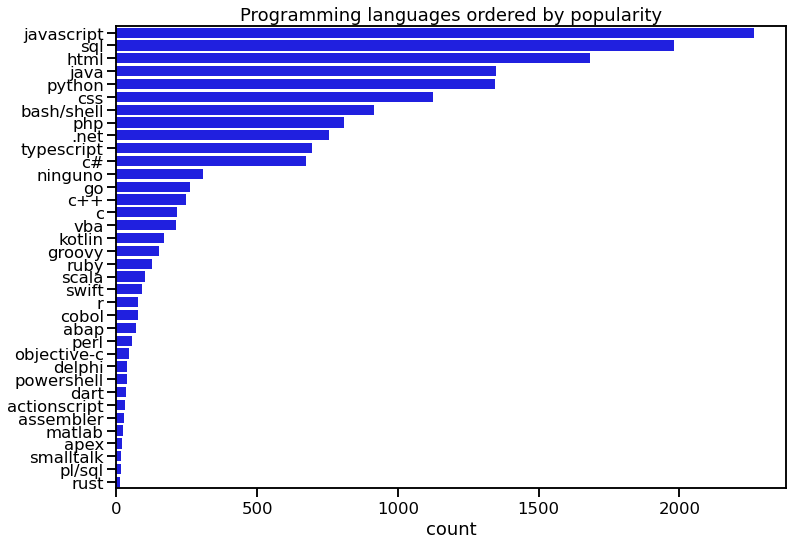

In [17]:
# Ahora sí, finalmente organizamos los lenguajes de programación desde los más populares a los menos populares

fig = plt.figure(figsize=(12,8.5))
sns.countplot(data=df_cured,y='programming_language', color='blue',\
             order=df_cured['programming_language'].value_counts().index)
plt.title('Programming languages ordered by popularity')
plt.ylabel('');
#plt.xticks(rotation=90);

3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

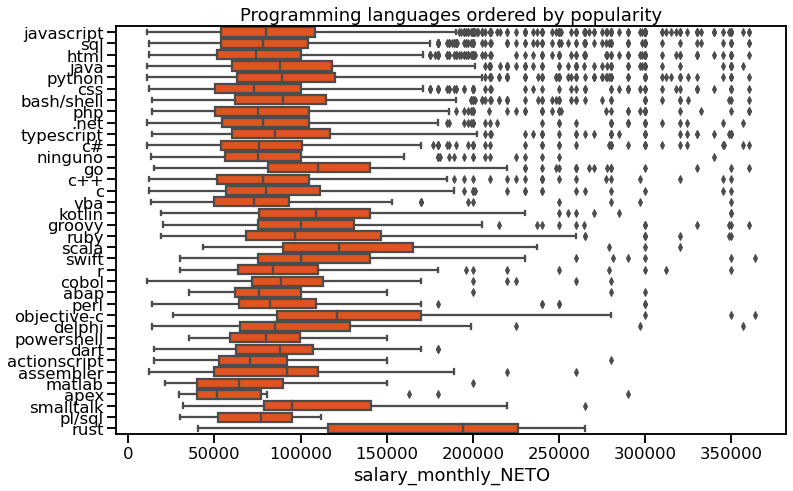

In [18]:
# Recordando la pregunta original: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?
# Creo que una forma de responderla através de un gráfico de cajas para cada lenguaje de nuestro dataset curado

plt.figure(figsize=(12, 7.5))
sns.boxplot(data=df_cured, x='salary_monthly_NETO', y='programming_language',color='orangered',\
          order=df_cured['programming_language'].value_counts().index)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Programming languages ordered by popularity')
plt.ylabel('');

In [19]:
# Otra forma de responder la pregunta sería através de un gráfico lenguaje vs salario_promedio, y organizarlos
# desde los lenguajes asociados a salarios más altos hasta los más bajos. Agregamos además la desviación estándar

Text(0.5, 1.0, 'Programming languages ordered by average salary')

<Figure size 864x612 with 0 Axes>

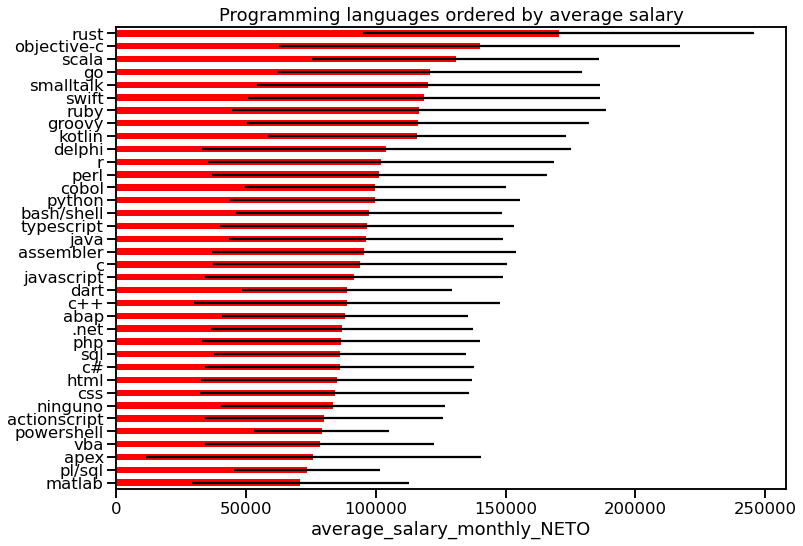

In [20]:
fig = plt.figure(figsize=(12,8.5))
groups.sort_values('mean', ascending=True).plot(kind = "barh", y = "mean", legend = False, 
          xerr = "std", color='red',figsize=(12,8.5))
plt.ylabel('');
plt.xlabel('average_salary_monthly_NETO')
plt.title('Programming languages ordered by average salary')

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
